In [ ]:
# from google.colab import files

# uploaded = files.upload()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import sklearn.model_selection
# import spacy
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import io
# from sklearn.model_selection import train_test_split


# df = pd.read_csv(io.BytesIO(uploaded['comp1804_coursework_dataset_23-24 (1).csv']))
# # df = pd.read_csv('/content/comp1804_coursework_dataset/comp1804_coursework_dataset_23-24 (1).csv', index_col=0) #this end with no par_id for some reason

# pd.plotting.register_matplotlib_converters()
import sklearn.model_selection
import spacy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/comp1804_coursework_dataset_23-24 (1).csv')

pd.plotting.register_matplotlib_converters()

#  DATA PREPROCCESING

In [ ]:
df

,par_id,paragraph,has_entity,lexicon_count,difficult_words,last_editor_gender,category,text_clarity
0,428209002237,Ramsay was born in Glasgow on 2 October 1852. ...,ORG_YES_PRODUCT_NO_PERSON_YES_,49,12.0,man,biographies,clear_enough
1,564218010072,It has been widely estimated for at least the ...,ORG_YES_PRODUCT_NO_PERSON_NO_,166,47.0,man,artificial intelligence,not_clear_enough
2,291401001672,He went on to win the Royal Medal of the Royal...,ORG_YES_PRODUCT_NO_PERSON_NO_,69,18.0,non-binary,biographies,clear_enough
3,31548004883,The changes have altered many underlying assum...,ORG_NO_PRODUCT_YES_PERSON_NO_,76,27.0,non-binary,programming,clear_enough
4,50634005146,"After these novels were published, Disraeli de...",ORG_YES_PRODUCT_YES_PERSON_YES_,200,47.0,man,biographies,not_clear_enough
...,...,...,...,...,...,...,...,...
9342,200523007578,Sir Joseph Dalton Hooker was a British botani...,ORG_YES_PRODUCT_NO_PERSON_YES_,54,16.0,man,biographies,NaN
9343,50634005203,As successful invasions of India generally cam...,ORG_YES_PRODUCT_NO_PERSON_YES_,217,46.0,woman,biographies,NaN
9344,6437003939,Hawking was born on 8 January 1942 in Oxford t...,ORG_YES_PRODUCT_NO_PERSON_YES_,91,27.0,woman,biographies,NaN
9345,725259002815,More complex tasks can be making custom data e...,ORG_YES_PRODUCT_NO_PERSON_NO_,47,15.0,man,programming,NaN


In [ ]:
print(df.has_entity)

0        ORG_YES_PRODUCT_NO_PERSON_YES_
1         ORG_YES_PRODUCT_NO_PERSON_NO_
2         ORG_YES_PRODUCT_NO_PERSON_NO_
3         ORG_NO_PRODUCT_YES_PERSON_NO_
4       ORG_YES_PRODUCT_YES_PERSON_YES_
                     ...               
9342     ORG_YES_PRODUCT_NO_PERSON_YES_
9343     ORG_YES_PRODUCT_NO_PERSON_YES_
9344     ORG_YES_PRODUCT_NO_PERSON_YES_
9345      ORG_YES_PRODUCT_NO_PERSON_NO_
9346       ORG_NO_PRODUCT_NO_PERSON_NO_
Name: has_entity, Length: 9347, dtype: object


In [ ]:
print(df.columns)


Index(['par_id', 'paragraph', 'has_entity', 'lexicon_count', 'difficult_words',
       'last_editor_gender', 'category', 'text_clarity'],
      dtype='object')


In [ ]:

target_id = 564218010072

specific_row = df[df['par_id'] == target_id]

print("Specific row:")
print(specific_row)

Specific row:
         par_id                                          paragraph  \
1  564218010072  It has been widely estimated for at least the ...   

                      has_entity  lexicon_count  difficult_words  \
1  ORG_YES_PRODUCT_NO_PERSON_NO_            166             47.0   

  last_editor_gender                 category      text_clarity  
1                man  artificial intelligence  not_clear_enough  


In [ ]:
df['par_id'].fillna('nan', inplace=True)
df['category'].fillna('nan', inplace=True)
df['paragraph'].fillna('nan', inplace=True)
df['has_entity'].fillna('nan', inplace=True)
df['lexicon_count'].fillna('nan', inplace=True)
df['difficult_words'].fillna('nan', inplace=True)
df['last_editor_gender'].fillna('nan', inplace=True)

df['text_clarity'].fillna('to be decided', inplace=True)


In [ ]:
print(df.iloc[88])


par_id                                                      79225005845
paragraph             Pepys was the fifth of 11 children, but child ...
has_entity                               ORG_YES_PRODUCT_NO_PERSON_YES_
lexicon_count                                                        86
difficult_words                                                     nan
last_editor_gender                                                  man
category                                                    biographies
text_clarity                                              to be decided
Name: 88, dtype: object


In [ ]:
print(df['category'].unique())

['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence' 'Philosophy' 'nan' 'Programming'
 'Artificial intelligence' 'Biographies'
 'Movies about artificial intelligence']


In [ ]:
# The following text was generated using OpenAI's GPT-3.5 model on March , 2024:
# "The evaluation of artificial intelligence usage from ethical and academic perspectives is crucial to ensure accurate information flow. (Source: https://openai.com/gpt-3.5)"

df['category'] = df['category'].str.lower()  # Convert to lowercase

# Get unique category names
unique_categories = df['category'].unique()

# Print the unique category names
print(unique_categories)

['biographies' 'artificial intelligence' 'programming' 'philosophy'
 'movies about artificial intelligence' 'nan']


# DATA SPLITTING

In [ ]:
#split data into 2 datasets and each dataset only have columns paragragh and has_entity as input and category as output to train the model easily
input_p = df[['paragraph','has_entity']]
#input_h = df[['has_entity']]
output = df['category']

x_train, x_test, y_train, y_test = train_test_split(input_p, output, test_size=0.2, random_state=42)#splitting data into train and test sets 80 percent train and 20 percent test

train_data = pd.DataFrame({'paragraph' : x_train['paragraph'], 'has_entity': x_train['has_entity'], 'category': y_train })
test_data =pd.DataFrame({'paragraph': x_test['paragraph'], 'has_entity': x_test['has_entity'], 'category': y_test})

train_data.to_csv('train_dataset.csv', index=False)
test_data.to_csv('test_dataset.csv', index=False)

# train_data = pd.read_csv('/content/train_dataset.csv', index_col=0)
# train_data = pd.read_csv('/content/test_dataset.csv', index_col=0)

In [ ]:
type(train_data), type(test_data)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [ ]:
print(f'Length of train data: {len(train_data)}')
print(f'Length of test data: {len(test_data)}')
print(f'Length of test data: {len(df)}')


Length of train data: 7477
Length of test data: 1870
Length of test data: 9347


In [ ]:
# input_clm_1 = df['paragraph']
# input_clm_2 = df['has_entity']
# output_clm = df['category']
# print(input_clm_1.head())
# print(sep="  ")
# print(input_clm_2.head())
# print(sep="  ")
# print(output_clm.head())

In [ ]:
print(f"Number of duplicates in the training data: {train_data.duplicated().sum()}")
print(f"Number of duplicates in the test data: {test_data.duplicated().sum()}")
print(f"Number of duplicates in the df data: {df.duplicated().sum()}")


Number of duplicates in the training data: 184
Number of duplicates in the test data: 10
Number of duplicates in the df data: 215


In [ ]:
df = df.drop_duplicates()
# train_dataset = /content/train_dataset.csv.drop_duplicates()
# test_dataset = /content/test_dataset.csv.drop_duplicates()

In [ ]:
test_data['category'].value_counts()

biographies                             572
philosophy                              513
programming                             408
artificial intelligence                 335
movies about artificial intelligence     38
nan                                       4
Name: category, dtype: int64

In [ ]:
train_data['category'].value_counts()

biographies                             2383
philosophy                              2085
programming                             1582
artificial intelligence                 1241
movies about artificial intelligence     129
nan                                       57
Name: category, dtype: int64

In [ ]:
train_data

,paragraph,has_entity,category
6443,"Extension of the Bank to the north-west, the e...",ORG_YES_PRODUCT_NO_PERSON_NO_,biographies
5846,Thomson's separation of neon isotopes by their...,ORG_YES_PRODUCT_NO_PERSON_YES_,biographies
7104,"The Python License was an open-source, GPL-com...",ORG_YES_PRODUCT_NO_PERSON_NO_,programming
251,Now let's be clear before we go any further t...,ORG_YES_PRODUCT_NO_PERSON_YES_,biographies
8606,"A General System of Botany, Descriptive and An...",ORG_NO_PRODUCT_NO_PERSON_YES_,biographies
...,...,...,...
5734,Britannia Hospital is a 1982 British black com...,ORG_YES_PRODUCT_NO_PERSON_YES_,movies about artificial intelligence
5191,The earliest clear discussion of the karma doc...,ORG_YES_PRODUCT_NO_PERSON_YES_,philosophy
5390,Owen has been described by some as a malicious...,ORG_YES_PRODUCT_NO_PERSON_YES_,biographies
860,Boulton's share was worth little without Watt...,ORG_YES_PRODUCT_NO_PERSON_YES_,biographies


In [ ]:
train_data['category'].value_counts()

biographies                             2383
philosophy                              2085
programming                             1582
artificial intelligence                 1241
movies about artificial intelligence     129
nan                                       57
Name: category, dtype: int64

In [ ]:

nlp = spacy.load('en_core_web_sm')


# Tokenization & Lemmatization

**Tokenization**

In [ ]:
# doc= nlp(test_data.iloc[1]['paragraph'])

# print('The original document starts with:')
# print(test_data.iloc[1]['paragraph'][0:100])
# print('')

# print("Now let's print its first 20 tokens")
# for i,token in enumerate(doc):
#   print(f"Token number {i} is: '{token}'")
#   if i>20:
#     break

In [ ]:
doc= nlp(train_data.iloc[1]['paragraph'])

print('The original document starts with:')
print(train_data.iloc[1]['paragraph'][0:100])
print('')

print("Now let's print its first 20 tokens")
for i,token in enumerate(doc):
  print(f"Token number {i} is: '{token}'")
  if i>20:
    break

The original document starts with:
Thomson's separation of neon isotopes by their mass was the first example of mass spectrometry, whic

Now let's print its first 20 tokens
Token number 0 is: 'Thomson'
Token number 1 is: ''s'
Token number 2 is: 'separation'
Token number 3 is: 'of'
Token number 4 is: 'neon'
Token number 5 is: 'isotopes'
Token number 6 is: 'by'
Token number 7 is: 'their'
Token number 8 is: 'mass'
Token number 9 is: 'was'
Token number 10 is: 'the'
Token number 11 is: 'first'
Token number 12 is: 'example'
Token number 13 is: 'of'
Token number 14 is: 'mass'
Token number 15 is: 'spectrometry'
Token number 16 is: ','
Token number 17 is: 'which'
Token number 18 is: 'was'
Token number 19 is: 'subsequently'
Token number 20 is: 'improved'
Token number 21 is: 'and'


**Lemmatization**

In [ ]:
doc= nlp(train_data.iloc[1]['paragraph'])

print('The original document starts with:')
print(train_data.iloc[1]['paragraph'][0:100])
print('')

# check the lemmatized tokens
print("Now let's print the lemmatized version of its first 20 tokens")
for i,token in enumerate(doc):
  print(f"The token and its lemma for token number {i} is: '{token}', '{token.lemma_}'")
  if i>20:
    break

The original document starts with:
Thomson's separation of neon isotopes by their mass was the first example of mass spectrometry, whic

Now let's print the lemmatized version of its first 20 tokens
The token and its lemma for token number 0 is: 'Thomson', 'Thomson'
The token and its lemma for token number 1 is: ''s', ''s'
The token and its lemma for token number 2 is: 'separation', 'separation'
The token and its lemma for token number 3 is: 'of', 'of'
The token and its lemma for token number 4 is: 'neon', 'neon'
The token and its lemma for token number 5 is: 'isotopes', 'isotope'
The token and its lemma for token number 6 is: 'by', 'by'
The token and its lemma for token number 7 is: 'their', 'their'
The token and its lemma for token number 8 is: 'mass', 'mass'
The token and its lemma for token number 9 is: 'was', 'be'
The token and its lemma for token number 10 is: 'the', 'the'
The token and its lemma for token number 11 is: 'first', 'first'
The token and its lemma for token number 12

In [ ]:
spacy_stopwords = nlp.Defaults.stop_words
print(f"There are {len(spacy_stopwords)} stopwords in Spacy. These are:")
print(sorted(spacy_stopwords))
print()

There are 326 stopwords in Spacy. These are:
["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'ha

In [ ]:
doc= nlp(train_data.iloc[1]['paragraph'])

# check the original text
print('The original document starts with:')
print(train_data.iloc[1]['paragraph'][0:95])
print('')

# check which tokens are stopwords
print("Now let's print the first 20 tokens and check if they're stopwords")
for i,token in enumerate(doc):
  print(f"The token number {i} is '{token}', but is it a stopword? " + ("YES" if token.is_stop else "NO"))
  if i>20:
    break

The original document starts with:
Thomson's separation of neon isotopes by their mass was the first example of mass spectrometry,

Now let's print the first 20 tokens and check if they're stopwords
The token number 0 is 'Thomson', but is it a stopword? NO
The token number 1 is ''s', but is it a stopword? YES
The token number 2 is 'separation', but is it a stopword? NO
The token number 3 is 'of', but is it a stopword? YES
The token number 4 is 'neon', but is it a stopword? NO
The token number 5 is 'isotopes', but is it a stopword? NO
The token number 6 is 'by', but is it a stopword? YES
The token number 7 is 'their', but is it a stopword? YES
The token number 8 is 'mass', but is it a stopword? NO
The token number 9 is 'was', but is it a stopword? YES
The token number 10 is 'the', but is it a stopword? YES
The token number 11 is 'first', but is it a stopword? YES
The token number 12 is 'example', but is it a stopword? NO
The token number 13 is 'of', but is it a stopword? YES
The token n

In [ ]:

doc= nlp(train_data.iloc[1]['paragraph'])

print('The original document starts with:')
print(train_data.iloc[1]['paragraph'][0:95])
print('')

# check which tokens are punctuation symbols
print("Now let's print the first 20 tokens and check if they're punctuation symbols")
for i,token in enumerate(doc):
  print(f"The token number {i} is '{token}', but is it a punctuation symbol? " + ("YES" if token.is_punct else "NO"))
  if i>50:
    break

The original document starts with:
Thomson's separation of neon isotopes by their mass was the first example of mass spectrometry,

Now let's print the first 20 tokens and check if they're punctuation symbols
The token number 0 is 'Thomson', but is it a punctuation symbol? NO
The token number 1 is ''s', but is it a punctuation symbol? NO
The token number 2 is 'separation', but is it a punctuation symbol? NO
The token number 3 is 'of', but is it a punctuation symbol? NO
The token number 4 is 'neon', but is it a punctuation symbol? NO
The token number 5 is 'isotopes', but is it a punctuation symbol? NO
The token number 6 is 'by', but is it a punctuation symbol? NO
The token number 7 is 'their', but is it a punctuation symbol? NO
The token number 8 is 'mass', but is it a punctuation symbol? NO
The token number 9 is 'was', but is it a punctuation symbol? NO
The token number 10 is 'the', but is it a punctuation symbol? NO
The token number 11 is 'first', but is it a punctuation symbol? NO
Th

In [ ]:
doc= nlp(train_data.iloc[1]['paragraph'])

processed_tokens_list = []
for token in doc:
  if (token.is_stop) or (token.is_punct):
    pass
  else:
    processed_tokens_list.append(token.lemma_)

processed_doc= ' '.join(processed_tokens_list)

print('Original text:')
print(doc.text[:200])

print()
print('Processed text:')
print(processed_doc[:200])

print()

Original text:
Thomson's separation of neon isotopes by their mass was the first example of mass spectrometry, which was subsequently improved and developed into a general method by F. W. Aston and by A. J. Dempster

Processed text:
Thomson separation neon isotope mass example mass spectrometry subsequently improve develop general method F. W. Aston a. J. Dempster



In [ ]:
doc= nlp(train_data.iloc[1]['paragraph'])

print('The original document starts with:')
print(df.iloc[1]['paragraph'][0:95])
print('')

# check which tokens are punctuation symbols
print("#, Text, Lemma, is_stop, is_punct, is_digit")
for i,token in enumerate(doc):
  print(f"{i}, {token.text}, {token.lemma_}, {token.is_stop}, {token.is_punct}, {token.is_digit}")
  if i>100:
    break

The original document starts with:
It has been widely estimated for at least the last generation that all the programs and resourc

#, Text, Lemma, is_stop, is_punct, is_digit
0, Thomson, Thomson, False, False, False
1, 's, 's, True, False, False
2, separation, separation, False, False, False
3, of, of, True, False, False
4, neon, neon, False, False, False
5, isotopes, isotope, False, False, False
6, by, by, True, False, False
7, their, their, True, False, False
8, mass, mass, False, False, False
9, was, be, True, False, False
10, the, the, True, False, False
11, first, first, True, False, False
12, example, example, False, False, False
13, of, of, True, False, False
14, mass, mass, False, False, False
15, spectrometry, spectrometry, False, False, False
16, ,, ,, False, True, False
17, which, which, True, False, False
18, was, be, True, False, False
19, subsequently, subsequently, False, False, False
20, improved, improve, False, False, False
21, and, and, True, False, False
22, develo

In [ ]:
from time import time
t_start= time()
train_processed = list(nlp.pipe(df['paragraph'].iloc[:1000]))
print(f'Processing the entire training data took {time()-t_start:.2f} seconds')

Processing the entire training data took 16.24 seconds


In [ ]:
# we can now iterate through the whole corpus to get a document and then...
for j,doc in enumerate(train_processed):
  #... iterate through each document to get its tokens with their attribute
  for i,token in enumerate(doc):
    print(token.text, token.lemma_)
    if i>3:
      # only do this for the first 4 tokens
      print()
      break
  if j>5:
    # only do this for the first 6 documents
    break

Ramsay Ramsay
was be
born bear
in in
Glasgow Glasgow

It it
has have
been be
widely widely
estimated estimate

He he
went go
on on
to to
win win

The the
changes change
have have
altered alter
many many

After after
these these
novels novel
were be
published publish

Philo Philo
also also
proposes propose
that that
the the

   
This this
led lead
to to
the the



# MODELS

In [ ]:
# The following text was generated using OpenAI's GPT-3.5 model on March , 2024:
# "The evaluation of artificial intelligence usage from ethical and academic perspectives is crucial to ensure accurate information flow. (Source: https://openai.com/gpt-3.5)"

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, f1_score
# Split the data into training and testing sets
#train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(train_data['paragraph'])
X_test = vectorizer.transform(test_data['paragraph'])

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, train_data['category'])

# Predictions on the test set
predictions = classifier.predict(X_test)

# Calculate the metrics
accuracy = accuracy_score(test_data['category'], predictions)
f1 = f1_score(test_data['category'], predictions, average='weighted')
report = classification_report(test_data['category'], predictions)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(report)


Accuracy: 0.8941176470588236
F1 Score: 0.8844221886008544
Classification Report:
                                      precision    recall  f1-score   support

             artificial intelligence       0.97      0.79      0.87       335
                         biographies       0.87      0.92      0.90       572
movies about artificial intelligence       1.00      0.03      0.05        38
                                 nan       0.00      0.00      0.00         4
                          philosophy       0.84      0.95      0.89       513
                         programming       0.95      0.96      0.95       408

                            accuracy                           0.89      1870
                           macro avg       0.77      0.61      0.61      1870
                        weighted avg       0.90      0.89      0.88      1870



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#X_train = vectorizer.fit_transform(train_data['paragraph'])
#y_train = train_data['category']

#X_test = vectorizer.transform(test_data['paragraph'])
#y_test = test_data['category']


classifier = MultinomialNB()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)

misclassified_indices = test_data[test_data['category'] != predictions].index

misclassification_rate = len(misclassified_indices) / len(test_data)

accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions, average='weighted')
report = classification_report(y_test, predictions)

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print("Classification Report:")
print(report)
print(f"Misclassification Rate: {misclassification_rate * 100:.2f}%")

Accuracy: 0.8941176470588236
F1 Score: 0.8844221886008544
Classification Report:
                                      precision    recall  f1-score   support

             artificial intelligence       0.97      0.79      0.87       335
                         biographies       0.87      0.92      0.90       572
movies about artificial intelligence       1.00      0.03      0.05        38
                                 nan       0.00      0.00      0.00         4
                          philosophy       0.84      0.95      0.89       513
                         programming       0.95      0.96      0.95       408

                            accuracy                           0.89      1870
                           macro avg       0.77      0.61      0.61      1870
                        weighted avg       0.90      0.89      0.88      1870

Misclassification Rate: 10.59%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

vectorizer = TfidfVectorizer(stop_words='english')

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
misclassification_rate = 1 - accuracy_score(y_test, predictions)

iteration = 0
max_iterations = 10 
target_misclassification_rate = 0.10

while misclassification_rate > target_misclassification_rate and iteration < max_iterations:

    classifier.fit(X_train, y_train)

    predictions = classifier.predict(X_test)

    misclassification_rate = 1 - accuracy_score(y_test, predictions)

    print(f"Iteration {iteration + 1}: Misclassification Rate: {misclassification_rate * 100:.2f}%")

    iteration += 1

accuracy = accuracy_score(y_test, predictions)
print("Final Results:")
print(f"Accuracy: {accuracy}")

#i keep getting 10.73 for every iteration this means i need to change the model

Iteration 1: Misclassification Rate: 10.59%
Iteration 2: Misclassification Rate: 10.59%
Iteration 3: Misclassification Rate: 10.59%
Iteration 4: Misclassification Rate: 10.59%
Iteration 5: Misclassification Rate: 10.59%
Iteration 6: Misclassification Rate: 10.59%
Iteration 7: Misclassification Rate: 10.59%
Iteration 8: Misclassification Rate: 10.59%
Iteration 9: Misclassification Rate: 10.59%
Iteration 10: Misclassification Rate: 10.59%
Final Results:
Accuracy: 0.8941176470588236


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.sparse import hstack

vectorizer_text = TfidfVectorizer(stop_words='english')
X_train_text = vectorizer_text.fit_transform(train_data['paragraph'])# TEXT OLARAK HAS_ENTITY KULLANDIGIM ICIN ONU DA TOKENIZE ETTIM LABEL ENCODER DA KULLANILABILIR BENCE RAPOR YAZMADAN BIR DAHA BI BAK
X_test_text = vectorizer_text.transform(test_data['paragraph'])

vectorizer_entity = TfidfVectorizer()
X_train_entity = vectorizer_entity.fit_transform(train_data['has_entity'].astype(str))
X_test_entity = vectorizer_entity.transform(test_data['has_entity'].astype(str))

X_train_combined = hstack((X_train_text, X_train_entity))
X_test_combined = hstack((X_test_text, X_test_entity))

# Etiketleri Al
#y_train = train_data['category']
#y_test = test_data['category']

classifier = MultinomialNB()
classifier.fit(X_train_combined, y_train)

predictions = classifier.predict(X_test_combined) #true lables

accuracy = accuracy_score(y_test, predictions)
misclassification_rate = 1 - accuracy

print(f"Accuracy: {accuracy}")
print(f"Misclassification Rate: {misclassification_rate * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.8582887700534759
Misclassification Rate: 14.17%
Classification Report:
                                      precision    recall  f1-score   support

             artificial intelligence       0.97      0.69      0.80       335
                         biographies       0.83      0.88      0.86       572
movies about artificial intelligence       0.00      0.00      0.00        38
                                 nan       0.00      0.00      0.00         4
                          philosophy       0.79      0.95      0.86       513
                         programming       0.94      0.94      0.94       408

                            accuracy                           0.86      1870
                           macro avg       0.59      0.58      0.58      1870
                        weighted avg       0.85      0.86      0.85      1870

Confusion Matrix:
[[230  34   0   0  58  13]
 [  4 506   0   0  59   3]
 [  0  36   0   0   1   1]
 [  1   2   0   0   1   0]
 [  2  1

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Since i was keep getting the same rate on every iteration that means model needs:

1. **More data**
2. **Adjusting the model parameters**
3. **Using a different model**
4. **Better preprocessing**
5. **Adjusting vectorized parameters** TF-IDF(exp:, min_df, max_df, ngram_range)
6. **Hiperparameter Adjustment**

In [ ]:
# The following text was generated using OpenAI's GPT-3.5 model on March , 2024:
# "The evaluation of artificial intelligence usage from ethical and academic perspectives is crucial to ensure accurate information flow. (Source: https://openai.com/gpt-3.5)"

from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.5, 1.0],  # different parameters for alpha
}

grid_search = GridSearchCV(MultinomialNB(), param_grid, cv=5)
grid_search.fit(X_train_combined, y_train)

best_classifier = grid_search.best_estimator_
print("En iyi parametreler:", grid_search.best_params_)

En iyi parametreler: {'alpha': 0.1}


In [ ]:

best_classifier.fit(X_train_combined, y_train)

predictions = best_classifier.predict(X_test_combined)

accuracy = accuracy_score(y_test, predictions)
misclassification_rate = 1 - accuracy

print(f"Accuracy: {accuracy}")
print(f"Misclassification Rate: {misclassification_rate * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Accuracy: 0.9208556149732621
Misclassification Rate: 7.91%
Classification Report:
                                      precision    recall  f1-score   support

             artificial intelligence       0.93      0.90      0.92       335
                         biographies       0.93      0.89      0.91       572
movies about artificial intelligence       1.00      0.74      0.85        38
                                 nan       0.00      0.00      0.00         4
                          philosophy       0.87      0.95      0.91       513
                         programming       0.97      0.97      0.97       408

                            accuracy                           0.92      1870
                           macro avg       0.78      0.74      0.76      1870
                        weighted avg       0.92      0.92      0.92      1870

Confusion Matrix:
[[303  11   0   0  15   6]
 [ 12 511   0   1  47   1]
 [  0   8  28   0   2   0]
 [  1   2   0   0   1   0]
 [  8  13

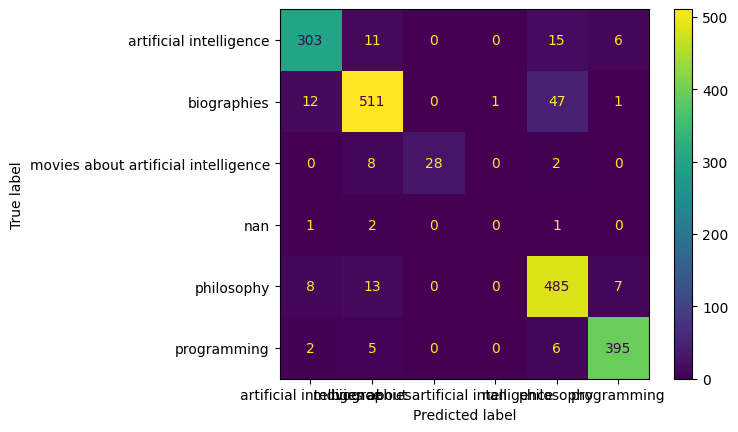

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid_search,X_test_combined,y_test)

# PART 2